## First Model: Perceptron
> ### PLA (Perceptron Learning Algorithms)
> ### Binary Classification

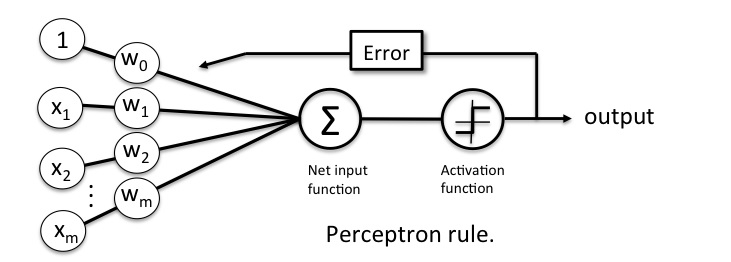

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from my_ml_tools.my_ml_plot import Plot_2d
from my_ml_tools.my_ml_plot import Plot_decision_regions
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image
Image(filename = './charts/Perceptron.jpg', width=600)

#### Net-Input function $z = w^T X$:
#### $z$: "net input" to an "artificial neuron":
> $z$ is a linear combination (weighted sum) of input $x$ and weights $w$   
> $z = w_0 x_0 + w_1 x_1 + \cdots + w_m x_m$ ($m$ features in each data instance)
#### $w$: weight coefficients (hypothsis parameters which the machine will learn from data)
> $w = \begin{bmatrix}
    w_0 \\
    w_1 \\
    \vdots \\
    w_m
    \end{bmatrix}$

#### $x$: data instances (each instance has $m$ features)    
> Add $x_0=1$ ("bias", to move the decision threshold to 0)    
> $x = \begin{bmatrix}
    x_0 \\
    x_1 \\
    \vdots \\
    x_m
    \end{bmatrix}$   

#### Terminology
> - features / attributes / measurements / dimensions   
> - instances / samples / observations   
> - class labels / targets

#### A dataset $X$ contains $n$ data instances:    
> $X = \begin{bmatrix}
    x_0^{(1)}    \quad x_0^{(2)} \quad \cdots \quad x_0^{(n)}\\
    x_1^{(1)}    \quad x_1^{(2)} \quad \cdots \quad x_1^{(n)}\\
    \vdots \\
    x_m^{(1)}    \quad x_m^{(2)} \quad \cdots \quad x_m^{(n)}\\
    \end{bmatrix}$
#### $z = w^T X$  (or $z^T = X^T w$ for easy vector "dot product" code implementation)

#### Activation function = Decision function (for Perceptron):   
> Unit step function $\phi(z) =
  \begin{cases}
    1    & \quad \text{if } z \geq 0 \text{  (positive)}\\
    0 \text{ (or -1)}    & \quad \text{otherwise} \text{  (negative)}
  \end{cases}$

> - Activation functions are an extremely important feature of the artificial neural networks. They basically decide whether a neuron should be activated or not. Whether the information that the neuron is receiving is relevant for the given information or should it be ignored.    
> - The activation function is the non-linear transformation that we do over the input signal. This transformed output is then sent to the next layer of neurons as input.    
> - When we do not have the activation function the weights and bias would simply do a linear transformation. A linear equation is simple to solve but is limited in its capacity to solve complex problems. A neural network without an activation function is essentially just a linear regression model. 

#### Use "errors count" to update $w$: 
> (1) Initial $w$: small random numbers  
> (2) Iterations to update $w$ to minimize errors (traversing every data instance in each iteration):   
>> (2a) Calculate $\hat{y}$   
>> (2b) Update $w := w + \Delta w$   
>> $\Delta w_j = \eta (y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$, $j=0, \cdots, m$    
>> $\eta$ is the <font color='blue'>learning rate</font> or multiplicative factor (a hyperparameter between 0 and 1)   
>>> $\Delta w_0 = \eta (y^{(i)} - \hat{y}^{(i)})$   
>>> $\Delta w_1 = \eta (y^{(i)} - \hat{y}^{(i)}) x_1^{(i)}$   
>>> $\Delta w_2 = \eta (y^{(i)} - \hat{y}^{(i)}) x_2^{(i)}$   

In [2]:
class myPerceptron:
    def __init__(self, eta=0.01, n_iter=1000, stop_criterion=True, random_state=0):
        self.eta = eta
        self.n_iter = int(n_iter)
        self.stop_criterion = stop_criterion
        self.random_state = random_state
        
    def fit(self, X, y):
        X1 = np.c_[np.ones(X.shape[0]), X]
        rng = np.random.RandomState(self.random_state)
        self.w_ = rng.normal(loc=0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        self.weights_ = [list(self.w_)]
        
        for i in range(self.n_iter):
            output = self.predict(X)
            errors = (y != output).sum()
            self.errors_.append(errors)
            self.w_ += self.eta * X1.T.dot(y - output)
            self.weights_.append(list(self.w_))
            if self.stop_criterion and errors == 0:
                break
        return self
    
    def net_input(self, X):
        return np.dot(np.c_[np.ones(X.shape[0]), X], self.w_)
        
    def predict(self, X):
        net_input = self.net_input(X)
        return np.where(net_input >= 0, 1, 0)
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return (y_hat == y).sum() / y.size

### A toy dataset: one-feature $x_1$
> Trying to find a line $\hat{y}=w_0 + w_1 x_1$ to fit data   
> (to make $\sum(y - \hat{y}) = 0$

(-5, 5)

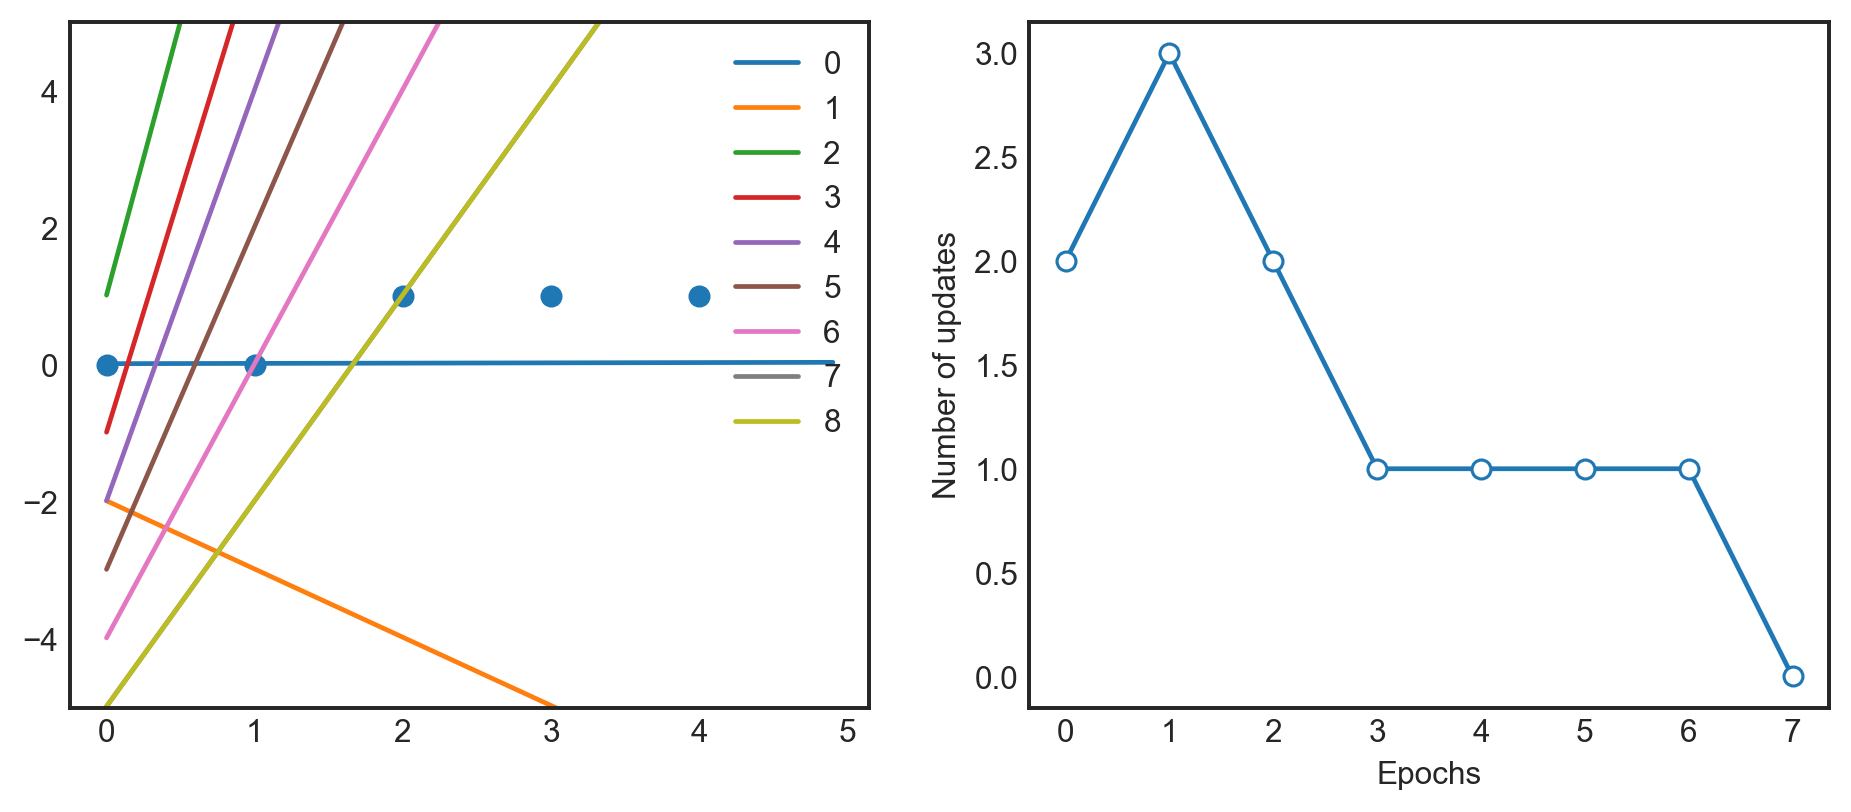

In [3]:
xx = np.arange(0, 5)
yy = [1 if i >=2 else 0 for i in xx]

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].scatter(xx, yy)

clf = myPerceptron(eta=1, n_iter=10, stop_criterion=True, random_state=0)
clf.fit(xx.reshape(-1, 1), yy)

axes[1].plot(range(len(clf.errors_)), clf.errors_, marker='o', mfc='w')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Number of updates')

line = np.arange(0, 5, 0.1)
for idx, w in enumerate(clf.weights_):
    axes[0].plot(line, w[0] + w[1] * line, label=(idx))
axes[0].legend()
axes[0].set_ylim(-5, 5)

<class 'sklearn.utils.Bunch'> 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']) 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 ['setosa' 'versicolor' 'virginica'] 
 (150, 4)


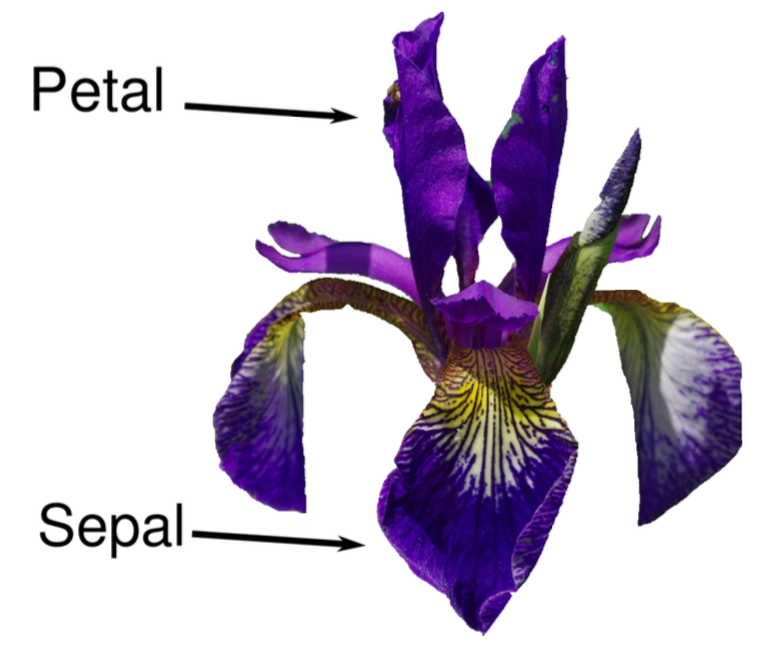

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris), '\n',
      iris.keys(), '\n',
      iris.feature_names, '\n',
      iris.target_names, '\n',
      iris.data.shape,
)

Image(filename = './charts/iris.png', width=200)

### Reduce number of features (dimension) to two for visualization purpose
> Select feature-0 and feature-2: 
> 'sepal length (cm)', 'petal length (cm)'

(0.0, 1.0, 0.0, 1.0)

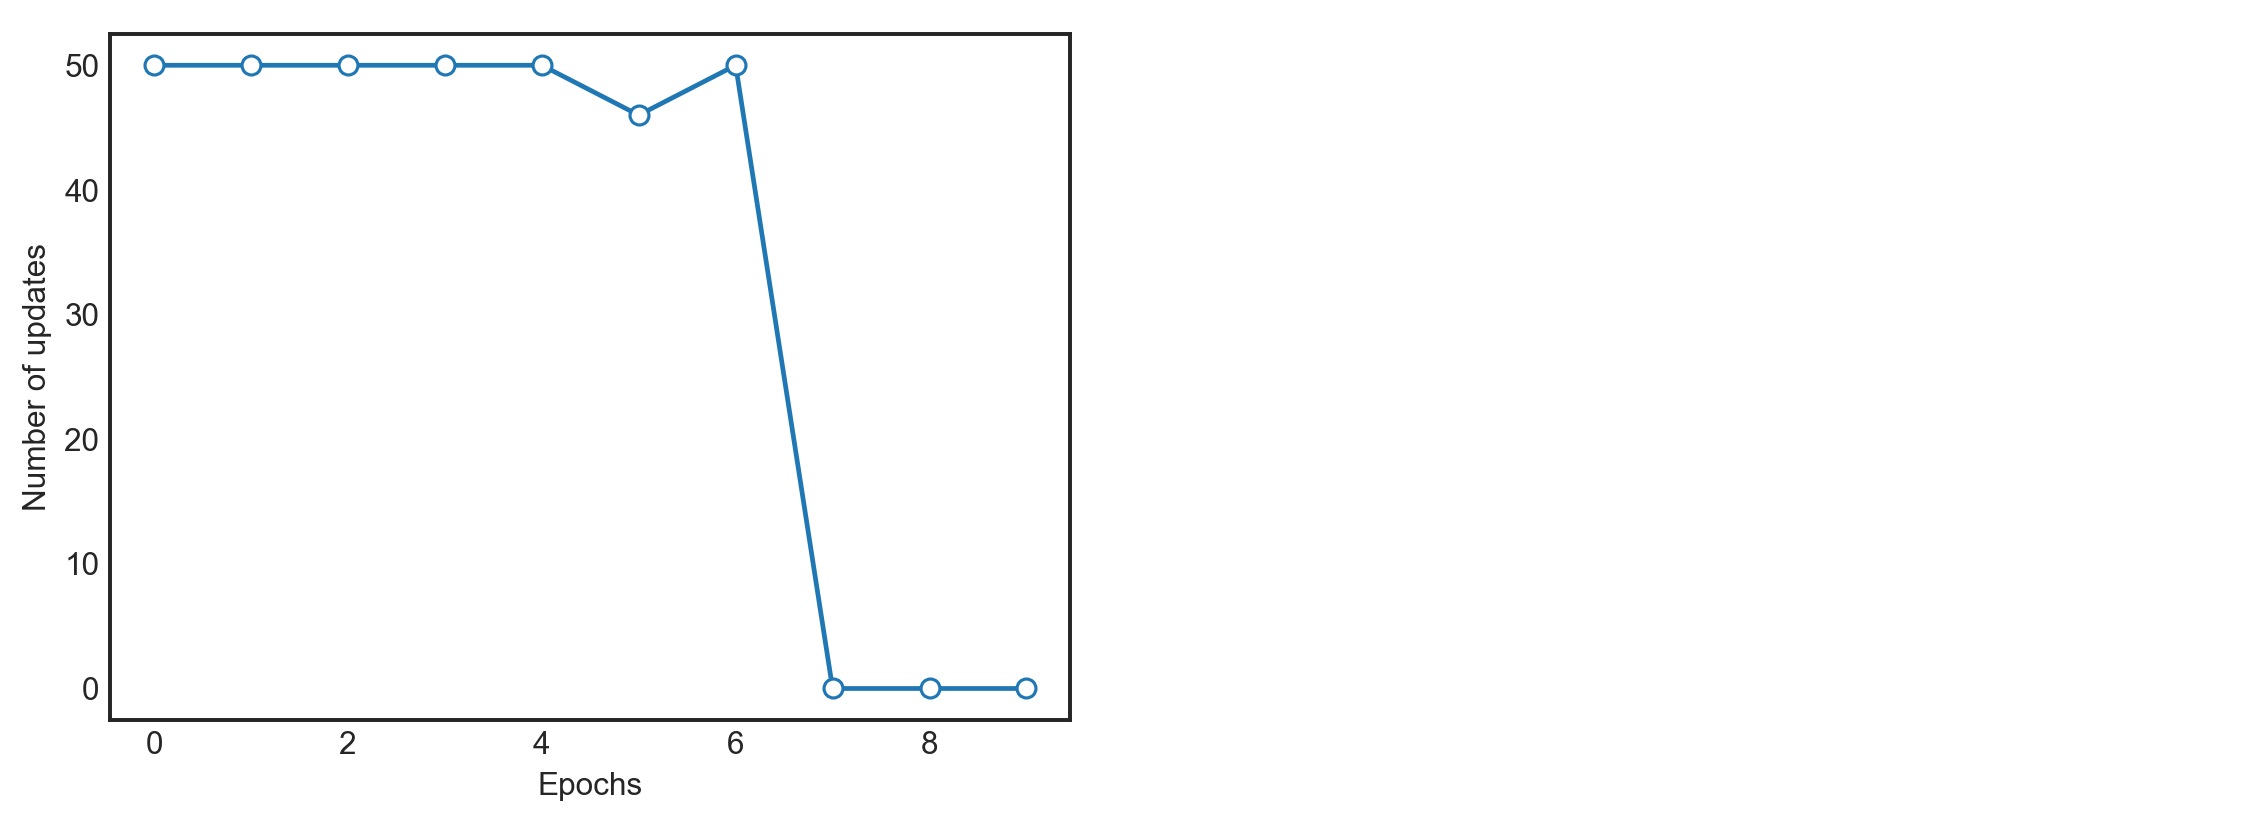

In [5]:
X, y = load_iris(return_X_y=True)
X = X[:100, [0, 2]]
y = y[:100]

clf = myPerceptron(eta=0.1, n_iter=10, stop_criterion=False, random_state=0)
clf.fit(X, y)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(12, 4))
axes[0].plot(range(len(clf.errors_)), clf.errors_, marker='o', mfc='w')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Number of updates')
axes[1].axis('off')

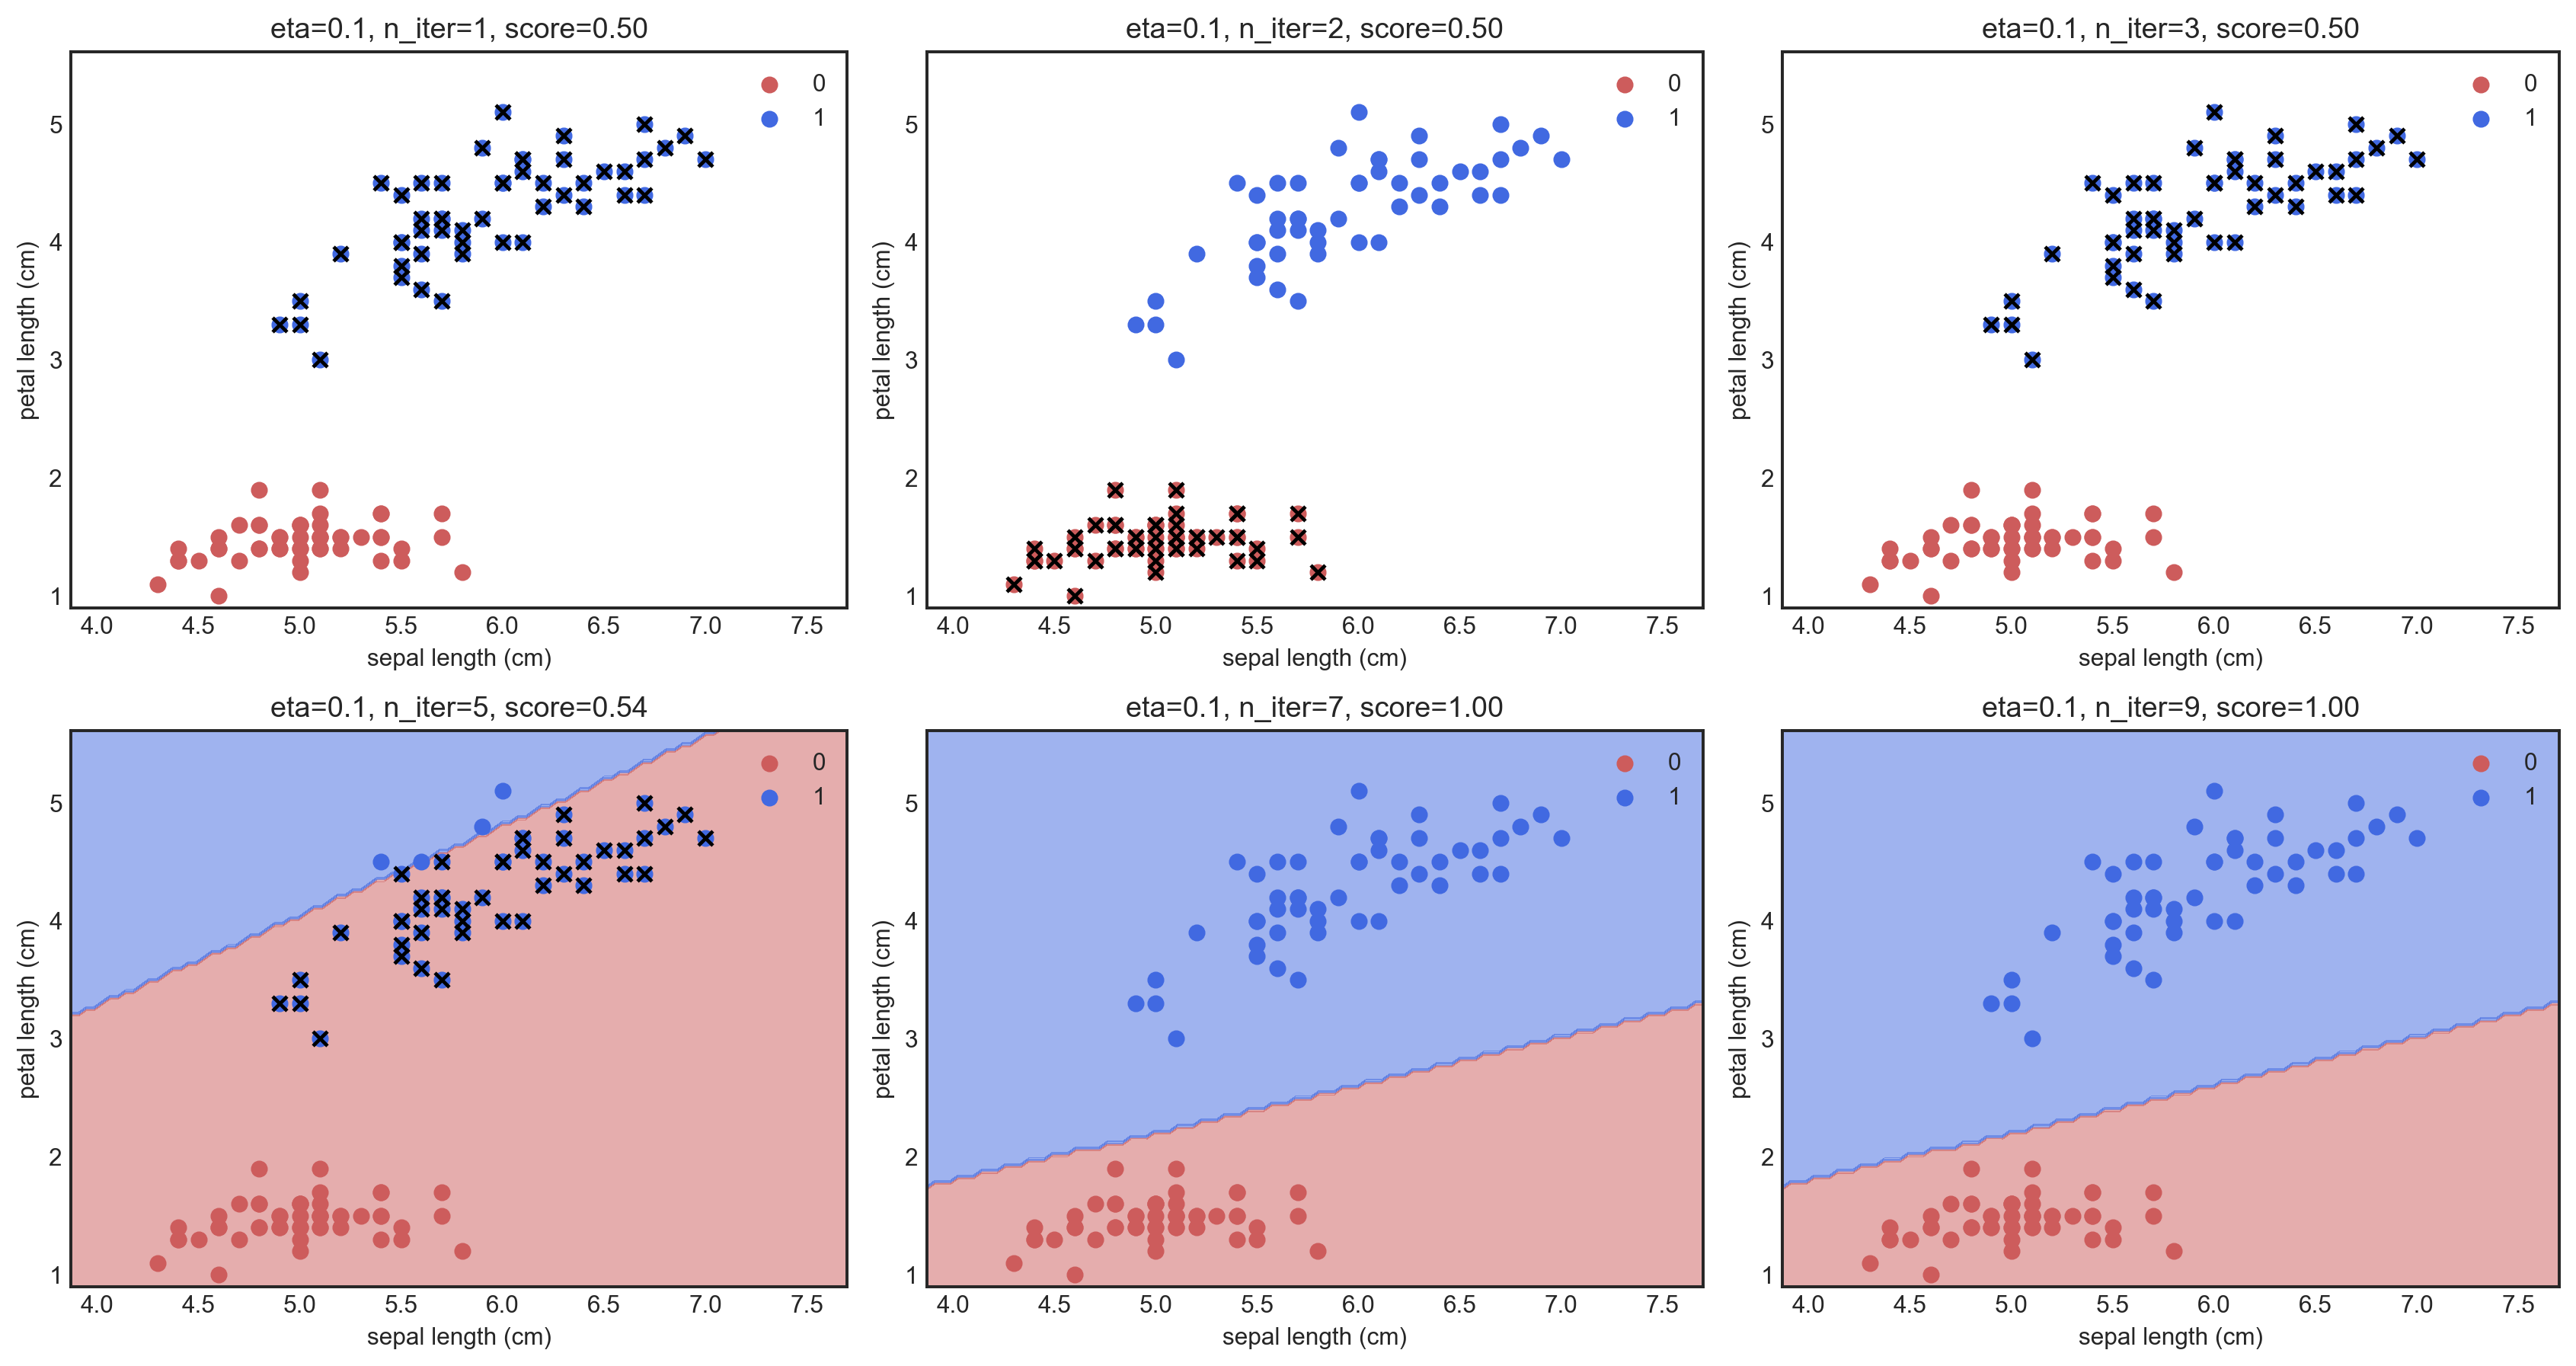

In [6]:
fig, axes = plt.subplots(2, 3, dpi=227, figsize=(15, 8))
axes = axes.ravel()
eta=0.1
for idx, n_iter in enumerate([1, 2, 3, 5, 7, 9]):
    clf = myPerceptron(eta=eta, n_iter=n_iter, random_state=0)
    clf.fit(X, y)
    Plot_decision_regions(clf, X, y, ax=axes[idx])
    axes[idx].set_title(f'eta={eta}, n_iter={n_iter}, score={clf.score(X, y):.2f}')
    axes[idx].set_xlabel(iris.feature_names[0])
    axes[idx].set_ylabel(iris.feature_names[2])
plt.tight_layout()

## sklearn (Scikit-Learn) API

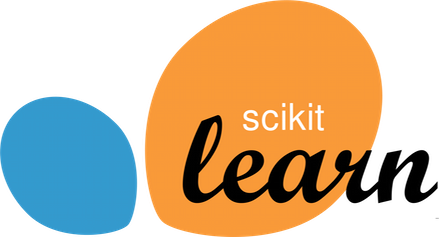

In [7]:
Image(filename = './charts/sklearn_logo.png', width=150)

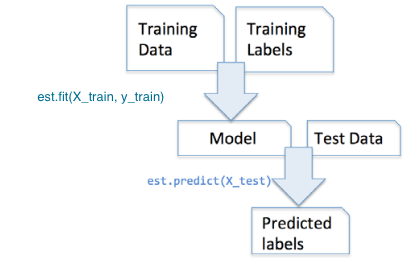

In [8]:
Image(filename = './charts/sklearn_API_1.png', width=400)

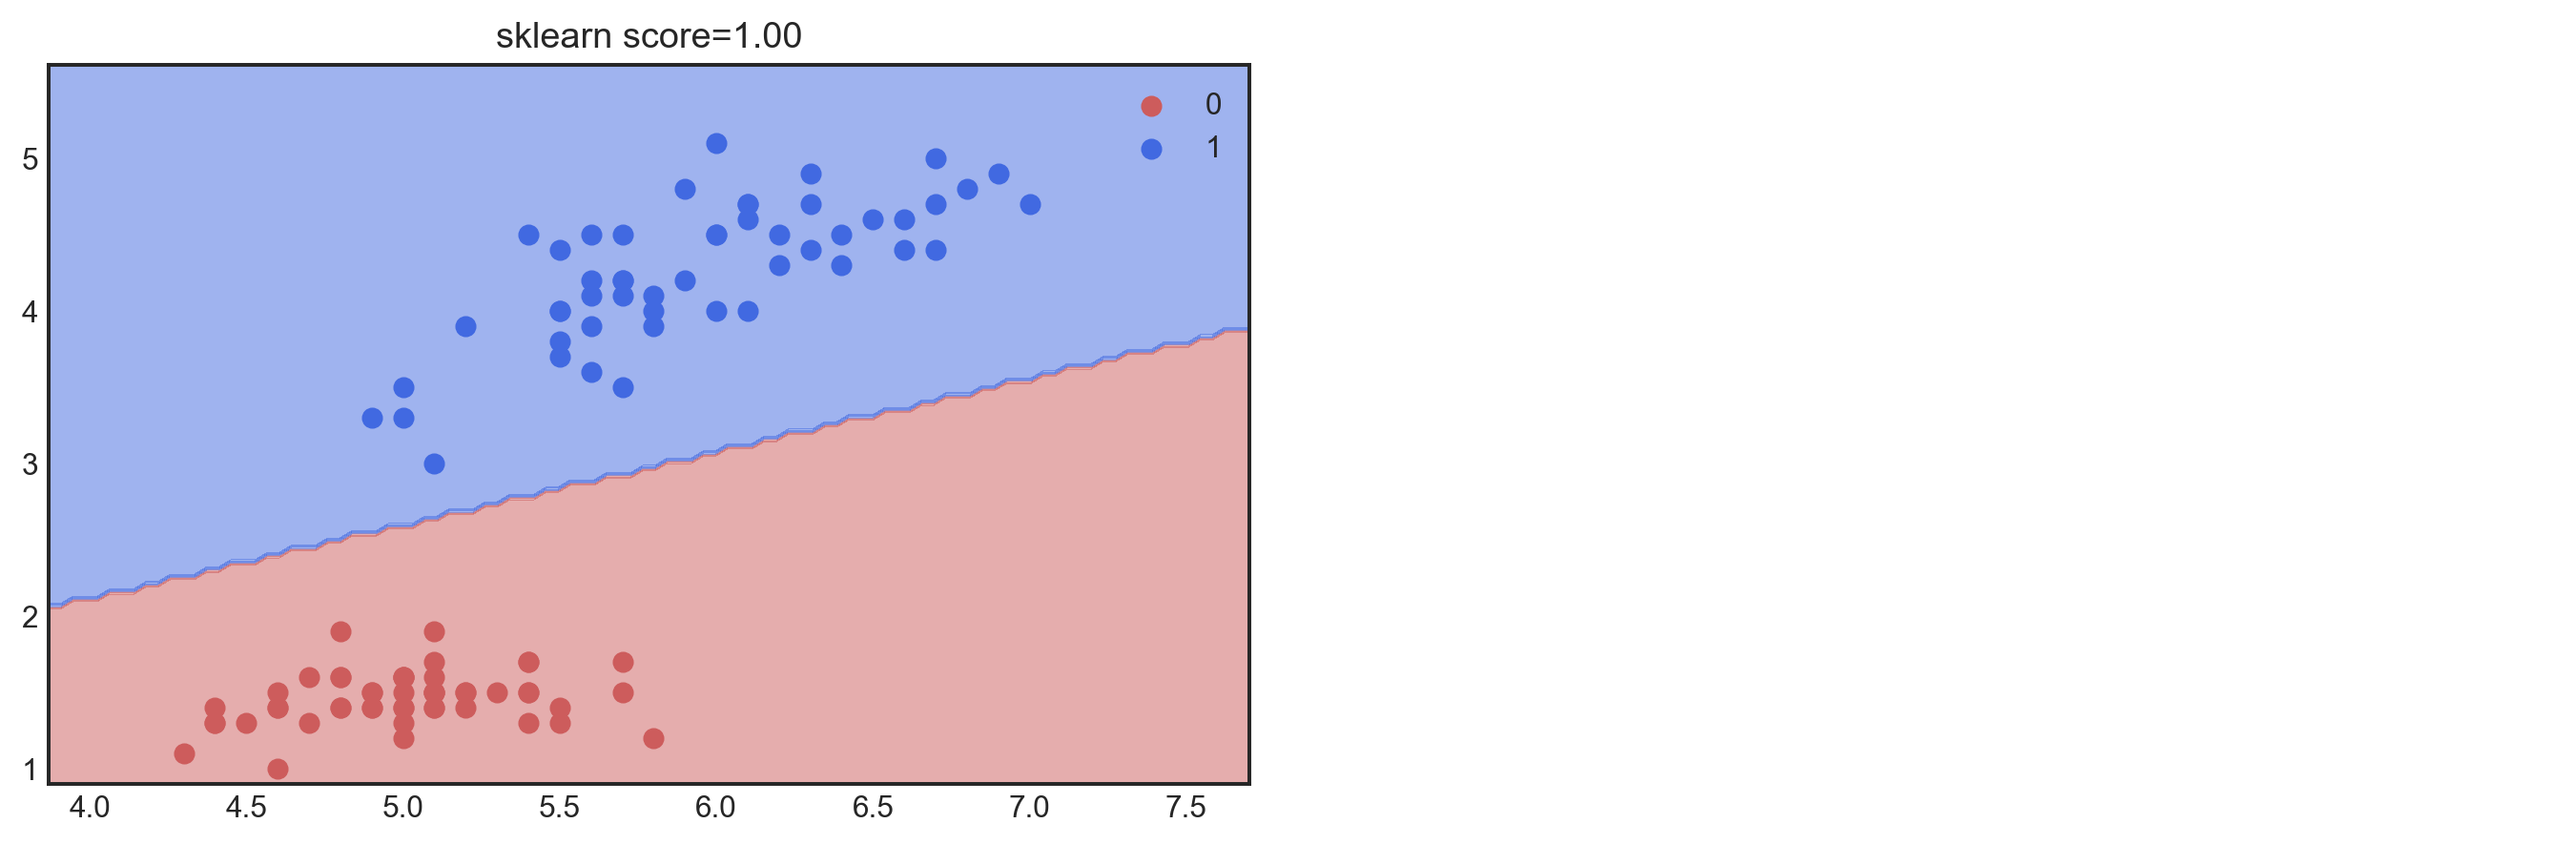

In [9]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X, y)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(12, 4))
Plot_decision_regions(clf, X, y, ax=axes[0])
axes[0].set_title(f'sklearn score={clf.score(X, y):.2f}')
axes[1].axis('off')
plt.tight_layout()

#### Perceptron 優點：
- 最簡單的線性分類演算法，Perceptron演算法的原理可推廣至其他複雜的演算法，因此許多課程或是書籍皆會以此當作最初的教材。

#### Perceptron 缺點：
- 一定要<font color='blue'>線性可分</font>，Perceptron演算法才會停下來 (實務上我們沒辦法事先知道資料是否線性可分)。
- Perceptron演算法的錯誤率<font color='blue'>不會逐步收斂</font>。
- Perceptron演算法只知道結果是0 (-1)或1，但沒辦法知道是個別的機率是多少。

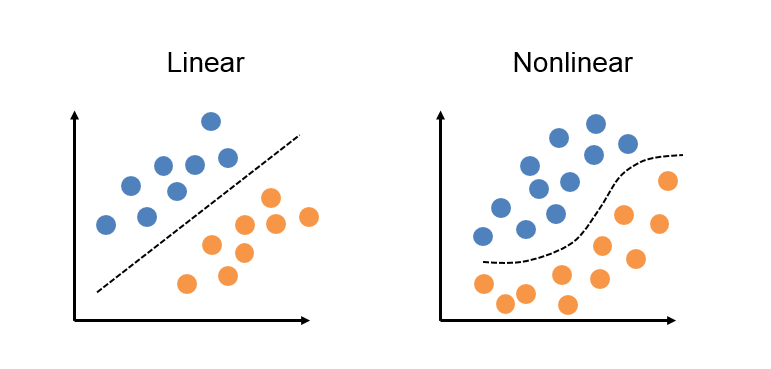

In [10]:
Image(filename = './charts/linear_nonlinear.png', width=500)

(0.0, 1.0, 0.0, 1.0)

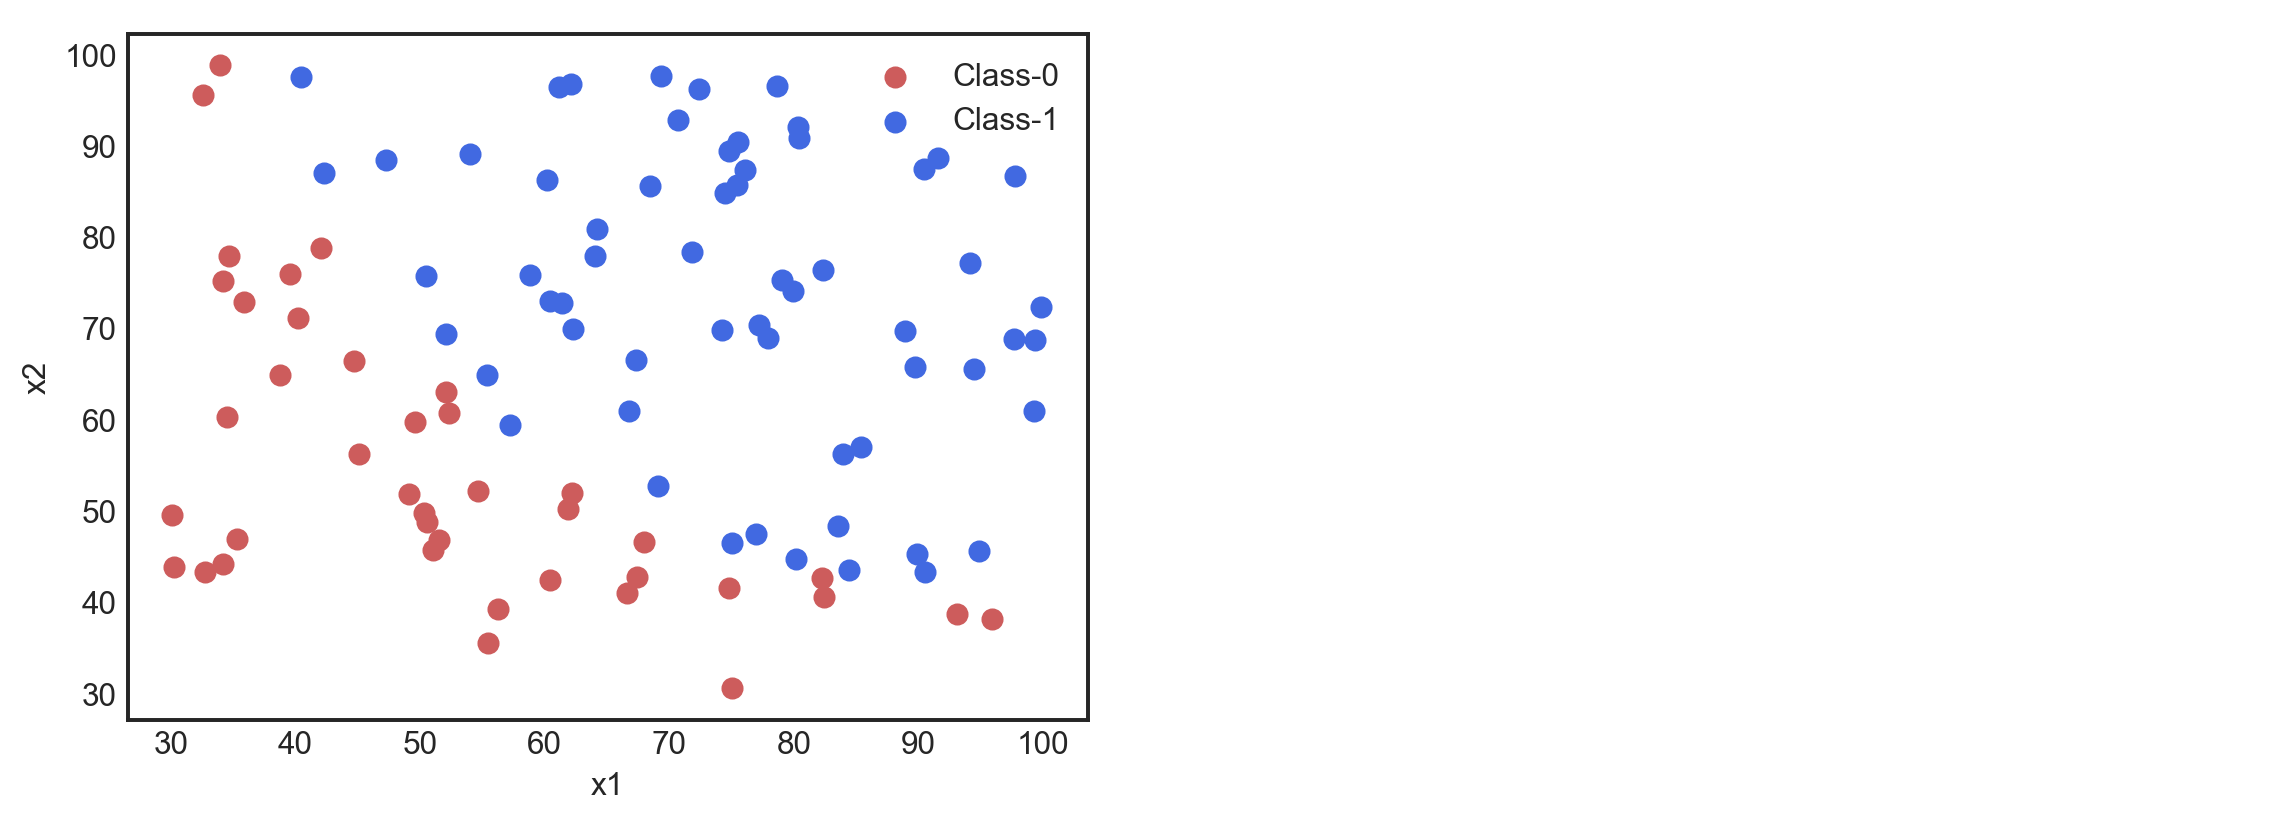

In [11]:
data = np.loadtxt('./data/ex2data1.txt', delimiter=',')
X2 = data[:, :2]
y2 = data[:, 2].astype(np.int)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(12, 4))
Plot_2d(X2, y2, ax=axes[0])
axes[1].axis('off')

(0.0, 1.0, 0.0, 1.0)

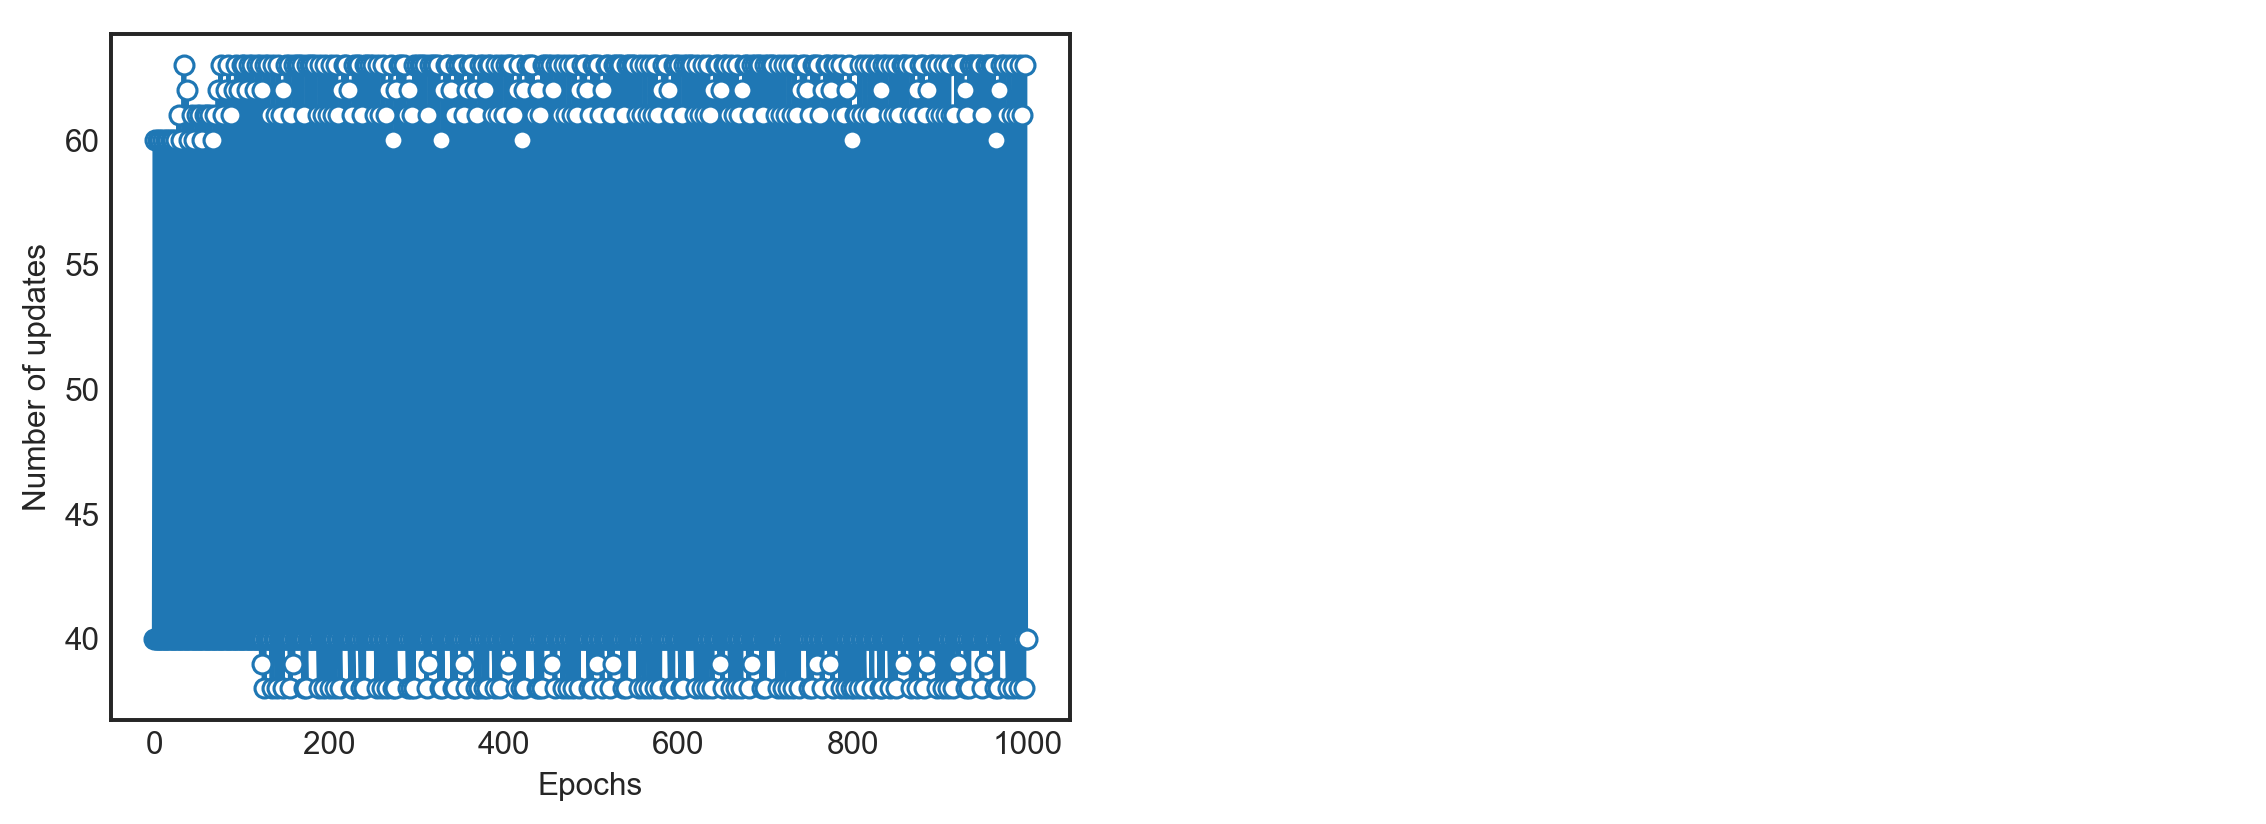

In [12]:
clf = myPerceptron()
clf.fit(X2, y2)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(12, 4))
axes[0].plot(range(len(clf.errors_)), clf.errors_, marker='o', mfc='w')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Number of updates')
axes[1].axis('off')

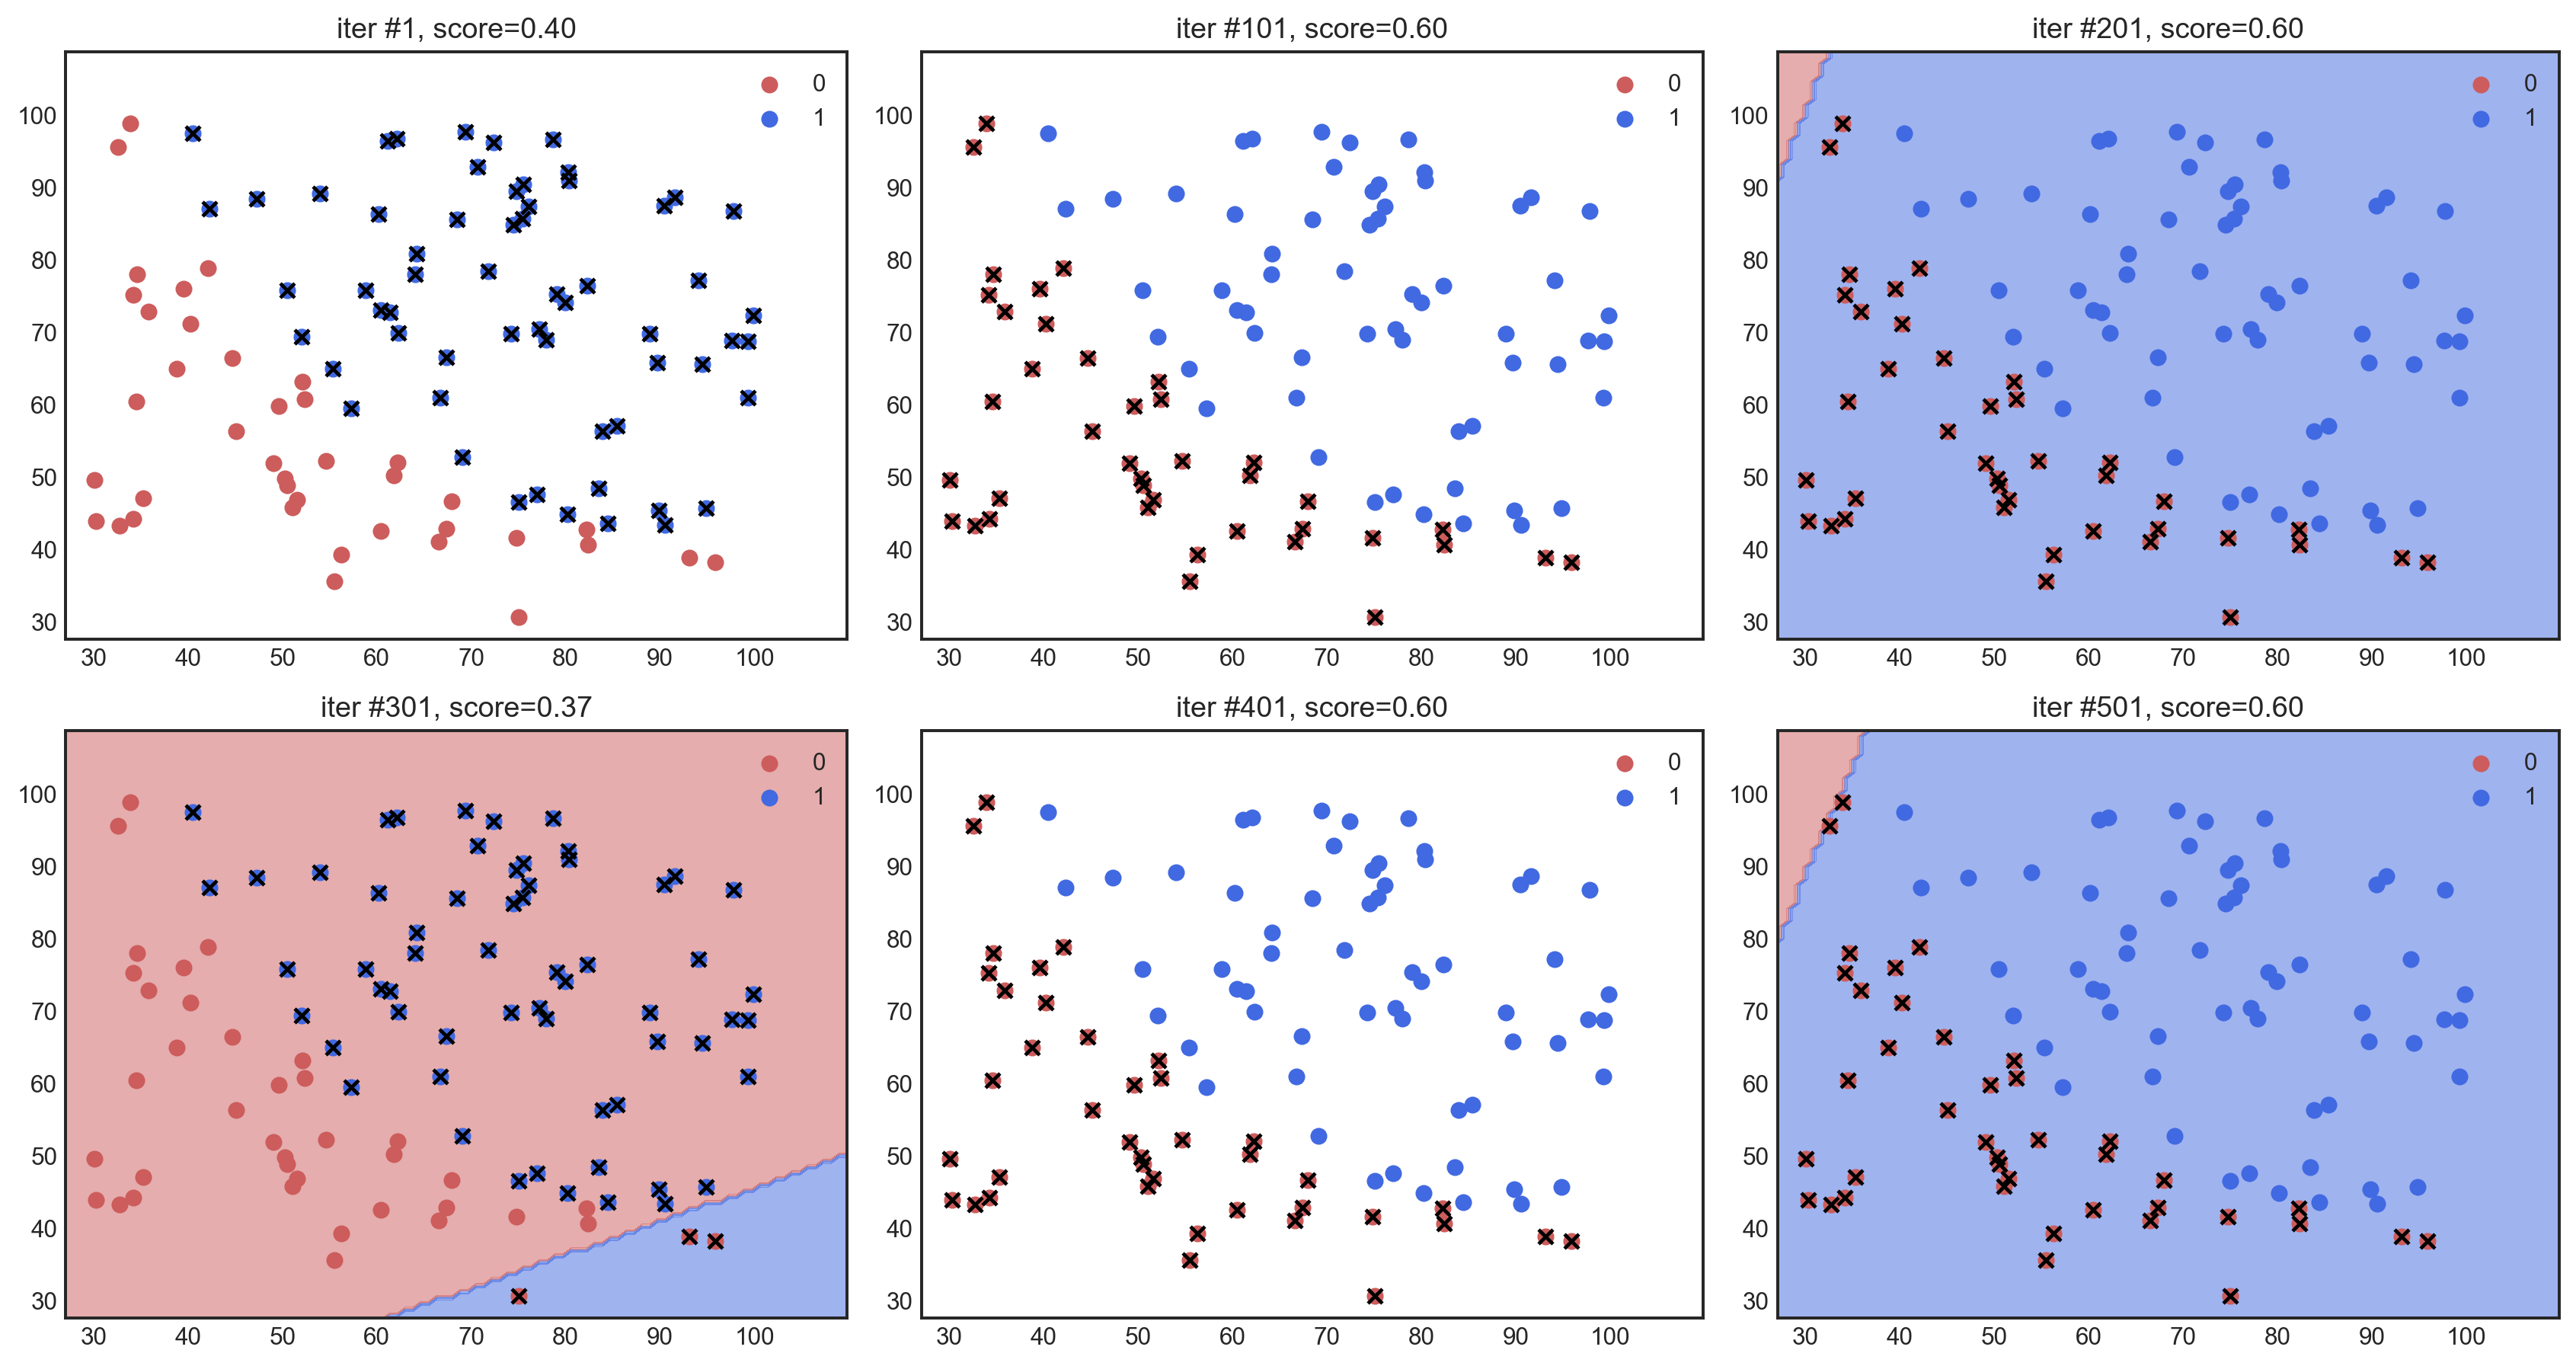

In [13]:
fig, axes = plt.subplots(2, 3, dpi=227, figsize=(15, 8))
axes = axes.ravel()
for idx, i in enumerate(range(0, 600, 100)):
    clf = myPerceptron(eta=0.1, n_iter=i+1, random_state=0)
    clf.fit(X2, y2)
    Plot_decision_regions(clf, X2, y2, ax=axes[idx])
    axes[idx].set_title(f'iter #{i+1}, score={clf.score(X2, y2):.2f}')
plt.tight_layout()

(0.0, 1.0, 0.0, 1.0)

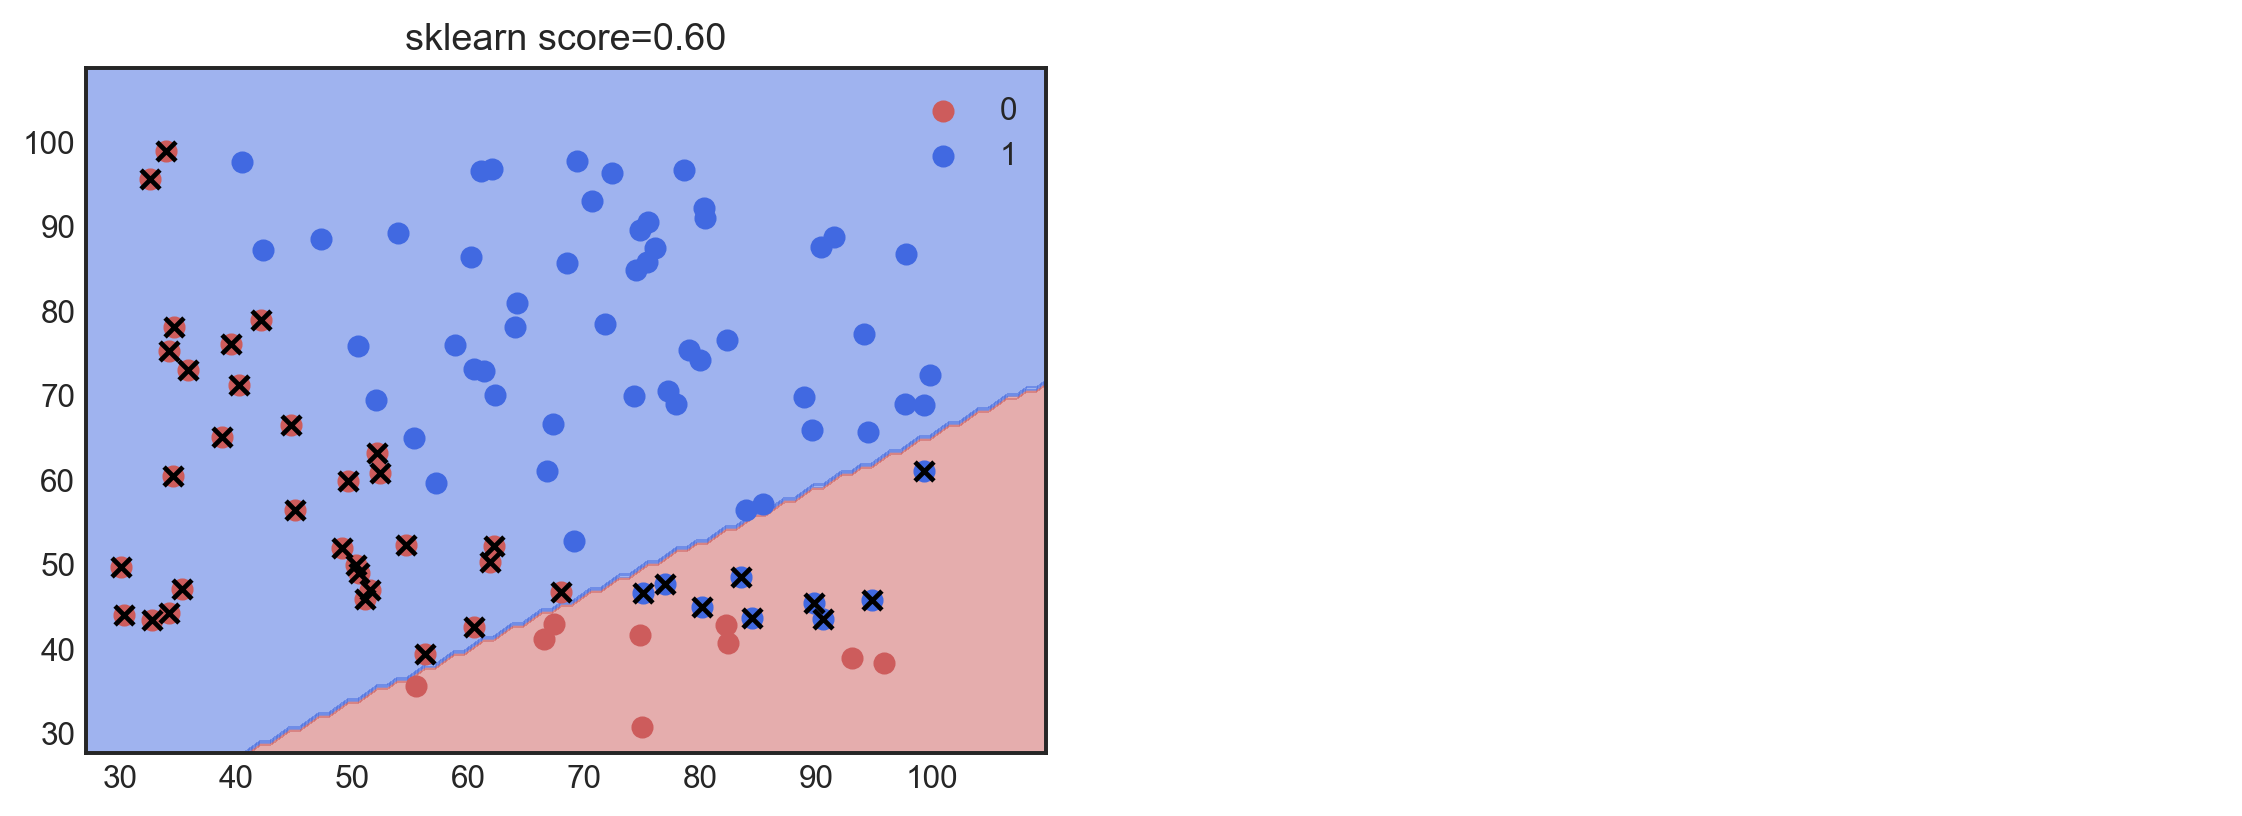

In [14]:
clf = Perceptron()
clf.fit(X2, y2)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(12, 4))
Plot_decision_regions(clf, X2, y2, ax=axes[0])
axes[0].set_title(f'sklearn score={clf.score(X2, y2):.2f}')
axes[1].axis('off')